In [2]:
# PRUEBA FINAL HERRAMIENTAS DEL CIENTIFICO DE DATOS
## Ejercicio 1 - Python
### Se pide: 

In [3]:
# Cargar los dos CSV como datasets

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotnine import *
from matplotlib import pyplot as plt

In [5]:
datos_2015 = pd.read_csv('2015.csv')
datos_2016 = pd.read_csv('2016.csv')

In [6]:
#Identificar las columnas de ambos datasets: ¿hay diferencias entre ambos?

In [7]:
datos_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [8]:
datos_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [9]:
""" 
Sí hay diferencia entre las columnas de ambos datasets, ya que ambos tienen muchas columnas del mismo nombre pero sin embargo hay otras que cambian por ejemplo 'Lower Confidence Interval', que se encuentra en el dataset del 2016.
"""

" \nSí hay diferencia entre las columnas de ambos datasets, ya que ambos tienen muchas columnas del mismo nombre pero sin embargo hay otras que cambian por ejemplo 'Lower Confidence Interval', que se encuentra en el dataset del 2016.\n"

In [10]:
#Une ambos dataframes, sin importar que los dos compartan las mismas diferencias.

In [11]:
df = pd.concat([datos_2015, datos_2016], ignore_index=True, join="outer")

In [12]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Benin,Sub-Saharan Africa,153,3.484,NaN,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,3.404,3.564
311,Afghanistan,Southern Asia,154,3.360,NaN,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,3.288,3.432
312,Togo,Sub-Saharan Africa,155,3.303,NaN,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,3.192,3.414
313,Syria,Middle East and Northern Africa,156,3.069,NaN,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2.936,3.202


In [13]:
#Revisa el número de nulos que hay por cada columna, así como su porcentaje.

In [14]:
df.isnull().sum().sum()

473

In [15]:
def show_nulls(df):
    #Nulos totales
    total_nan = df = df.isnull().sum()
    #Porcentaje de nulos
    perc_nan = total_nan/len(df)*100
    
    return total_nan, perc_nan

In [16]:
print('Total nulos', show_nulls(df=df)[0])

Total nulos Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
Standard Error                   157
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Lower Confidence Interval        158
Upper Confidence Interval        158
dtype: int64


In [17]:
print('Porcentaje de nulos', show_nulls(df=df)[1])

Porcentaje de nulos Country                             0.000000
Region                              0.000000
Happiness Rank                      0.000000
Happiness Score                     0.000000
Standard Error                   1121.428571
Economy (GDP per Capita)            0.000000
Family                              0.000000
Health (Life Expectancy)            0.000000
Freedom                             0.000000
Trust (Government Corruption)       0.000000
Generosity                          0.000000
Dystopia Residual                   0.000000
Lower Confidence Interval        1128.571429
Upper Confidence Interval        1128.571429
dtype: float64


In [19]:
# Cambia los valores nulos de las columnas "Lower Confidence Interval" y "Upper Confidence Interval" por un número aleatorio entre el valor mínimo y máximo de la misma columna (un único número, no es necesario uno diferente para cada fila con valor nulo).

In [37]:
df.min()

Country                                        Afghanistan
Region                           Australia and New Zealand
Happiness Rank                                           1
Happiness Score                                      2.839
Standard Error                                     0.01848
Economy (GDP per Capita)                               0.0
Family                                                 0.0
Health (Life Expectancy)                               0.0
Freedom                                                0.0
Trust (Government Corruption)                          0.0
Generosity                                             0.0
Dystopia Residual                                  0.32858
Lower Confidence Interval                            2.732
Upper Confidence Interval                              3.0
dtype: object

In [23]:
df.max()

Country                                Zimbabwe
Region                           Western Europe
Happiness Rank                              158
Happiness Score                           7.587
Standard Error                          0.13693
Economy (GDP per Capita)                1.82427
Family                                  1.40223
Health (Life Expectancy)                1.02525
Freedom                                 0.66973
Trust (Government Corruption)           0.55191
Generosity                              0.81971
Dystopia Residual                       3.83772
Lower Confidence Interval                  7.46
Upper Confidence Interval                 7.669
dtype: object

In [38]:
use_min , use_max = int(df['Lower Confidence Interval'].min()) , int(df['Lower Confidence Interval'].max())
import random

df['Lower Confidence Interval'].fillna(random.randint(use_min,use_max))

0      4.000
1      4.000
2      4.000
3      4.000
4      4.000
       ...  
310    3.404
311    3.288
312    3.192
313    2.936
314    2.732
Name: Lower Confidence Interval, Length: 315, dtype: float64

In [39]:
aleatorio_lower=df['Lower Confidence Interval'].fillna(random.randint(use_min,use_max))

In [40]:
use_min , use_max = int(df['Upper Confidence Interval'].min()) , int(df['Upper Confidence Interval'].max())

In [41]:
df['Upper Confidence Interval'].fillna(random.randint(use_min,use_max))

0      3.000
1      3.000
2      3.000
3      3.000
4      3.000
       ...  
310    3.564
311    3.432
312    3.414
313    3.202
314    3.078
Name: Upper Confidence Interval, Length: 315, dtype: float64

In [42]:
aleatorio_Upper=df['Upper Confidence Interval'].fillna(random.randint(use_min,use_max))

In [43]:
aleatorio_Upper=df['Upper Confidence Interval'].fillna(random.randint(use_min,use_max))

In [44]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,4.000,3.000
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,4.000,3.000
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,4.000,3.000
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,4.000,3.000
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,4.000,3.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Benin,Sub-Saharan Africa,153,3.484,NaN,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,3.404,3.564
311,Afghanistan,Southern Asia,154,3.360,NaN,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,3.288,3.432
312,Togo,Sub-Saharan Africa,155,3.303,NaN,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,3.192,3.414
313,Syria,Middle East and Northern Africa,156,3.069,NaN,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2.936,3.202


In [45]:
# Cambia los valores nulos de la columna "Standard Error" por su media al cuadrado.


In [46]:
df_Valores_nulos = df["Standard Error"]

In [47]:
media_al_cuadrado = df_Valores_nulos.mean()**2

In [48]:
media_al_cuadrado

0.002292948979494474

In [49]:
df = df.fillna(media_al_cuadrado)

In [53]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,Western Europe,1,7.587,0.034110,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,4.000,3.000
1,Iceland,Western Europe,2,7.561,0.048840,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,4.000,3.000
2,Denmark,Western Europe,3,7.527,0.033280,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,4.000,3.000
3,Norway,Western Europe,4,7.522,0.038800,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,4.000,3.000
4,Canada,North America,5,7.427,0.035530,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,4.000,3.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Benin,Sub-Saharan Africa,153,3.484,0.002293,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,3.404,3.564
311,Afghanistan,Southern Asia,154,3.360,0.002293,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,3.288,3.432
312,Togo,Sub-Saharan Africa,155,3.303,0.002293,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,3.192,3.414
313,Syria,Middle East and Northern Africa,156,3.069,0.002293,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2.936,3.202


In [52]:
# Obtén un resumen estadístico del dataframe sin valores nulos.

In [54]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,79.238095,5.378949,0.025161,0.899837,0.892647,0.594054,0.399896,0.140532,0.239957,2.212032,4.639162,4.237048
std,45.538922,1.141531,0.025851,0.410780,0.286718,0.240790,0.150684,0.115490,0.130077,0.558728,1.033074,1.478727
min,1.000000,2.839000,0.002293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.732000,3.000000
25%,40.000000,4.510000,0.002293,0.594900,0.739880,0.419645,0.295890,0.061315,0.151430,1.884135,4.000000,3.000000
50%,79.000000,5.286000,0.018480,0.973060,0.937930,0.640450,0.413190,0.106130,0.218540,2.211260,4.000000,3.000000
75%,118.500000,6.269000,0.043940,1.229000,1.087360,0.787640,0.516730,0.178610,0.311450,2.563470,5.231500,5.408500
max,158.000000,7.587000,0.136930,1.824270,1.402230,1.025250,0.669730,0.551910,0.819710,3.837720,7.460000,7.669000


In [55]:
#Comprobamos que no hay nulos

In [56]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Lower Confidence Interval        0
Upper Confidence Interval        0
dtype: int64

In [57]:
# Muestra de forma gráfica la relación entre la familia y la salud.

C:\Users\Lucia\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


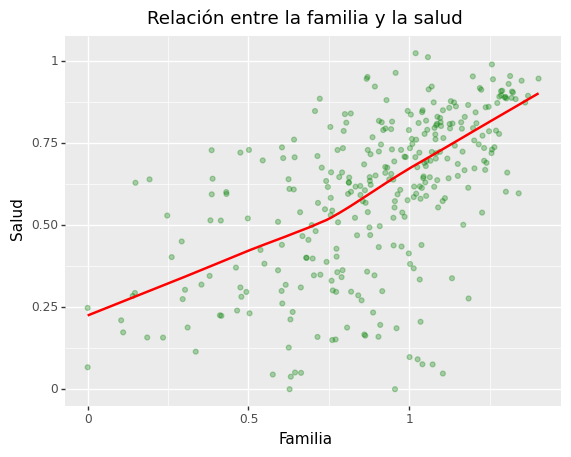

<ggplot: (97274469798)>

In [65]:
(ggplot(df)
+aes(y="Health (Life Expectancy)", x = "Family")
+geom_point(color="green", alpha=0.3 )
+geom_smooth(aes(y="Health (Life Expectancy)", x="Family"), color="red")
+ggtitle('Relación entre la familia y la salud')
+ylab('Salud')
+xlab('Familia')
)

In [67]:
"""
En esta nube de puntos podemos observar que cuanto más aumenta la familia, más aumenta la salud 
"""

'\nEn esta nube de puntos podemos observar que cuanto más aumenta la familia, más aumenta la salud \n'

In [68]:
# Muestra de forma gráfica la relación entre la puntuación de felicidad y la confianza (corrupción del gobierno).

C:\Users\Lucia\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


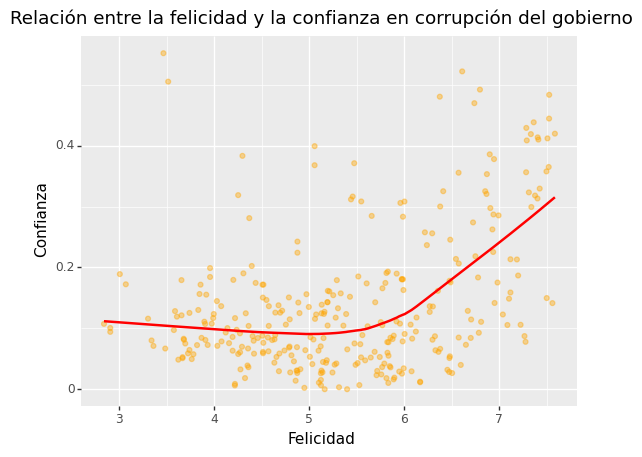

<ggplot: (97274680086)>

In [74]:
(ggplot(df)
+aes(y="Trust (Government Corruption)", x = "Happiness Score")
+geom_point(color="Orange", alpha=0.4 )
+geom_smooth(aes(y="Trust (Government Corruption)", x="Happiness Score"), color="red")
+ggtitle('Relación entre la felicidad y la confianza en corrupción del gobierno')
+ylab('Confianza')
+xlab('Felicidad')
)

In [75]:
"""
Podemos observar que no hay una fuerte relación entre ambas variables a excepción de la pequeña relación que hay en los valores mayores de Felicidad y de Confianza 
"""

'\nPodemos observar que no hay una fuerte relación entre ambas variables a excepción de la pequeña relación que hay en los valores mayores de Felicidad y de Confianza \n'

In [76]:
#Muestra la matriz de correlación del daframe.

In [77]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
Happiness Rank,1.000000,-0.993905,0.057798,-0.783247,-0.686502,-0.741182,-0.545570,-0.378864,-0.152613,-0.522146,-0.551931,-0.384256
Happiness Score,-0.993905,1.000000,-0.061461,0.779171,0.693547,0.734491,0.556414,0.397989,0.168272,0.526343,0.553648,0.384059
Standard Error,0.057798,-0.061461,1.000000,-0.186844,0.266522,0.027844,0.126096,-0.039259,-0.046720,-0.151971,-0.549045,-0.742382
Economy (GDP per Capita),-0.783247,0.779171,-0.186844,1.000000,0.566283,0.789103,0.331127,0.294856,-0.015402,0.079411,0.520120,0.413061
Family,-0.686502,0.693547,0.266522,0.566283,1.000000,0.569937,0.476671,0.205060,0.075987,0.053264,0.166458,-0.028370
Health (Life Expectancy),-0.741182,0.734491,0.027844,0.789103,0.569937,1.000000,0.369799,0.249773,0.088002,0.025248,0.310571,0.149690
Freedom,-0.545570,0.556414,0.126096,0.331127,0.476671,0.369799,1.000000,0.492875,0.356615,0.034829,0.183165,0.047799
Trust (Government Corruption),-0.378864,0.397989,-0.039259,0.294856,0.205060,0.249773,0.492875,1.000000,0.289499,-0.023504,0.199268,0.125263
Generosity,-0.152613,0.168272,-0.046720,-0.015402,0.075987,0.088002,0.356615,0.289499,1.000000,-0.110632,0.102493,0.078331
Dystopia Residual,-0.522146,0.526343,-0.151971,0.079411,0.053264,0.025248,0.034829,-0.023504,-0.110632,1.000000,0.415069,0.374016


In [78]:
#Tras unir los dataframes, los países aparecerán más de una vez. Muestra agrupado el dataframe por país con el valor máximo de felicidad, sin importar el año.

In [79]:
df.groupby("Country").max("Hapiness Score")

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
Country,,,,,,,,,,,,
Afghanistan,154,3.575,0.03084,0.38227,0.30285,0.30335,0.23414,0.09719,0.36510,2.14558,4.000,3.432
Albania,109,4.959,0.05013,0.95530,0.80434,0.81325,0.35733,0.06413,0.16840,1.92816,4.546,4.764
Algeria,68,6.355,0.05099,1.05266,1.07772,0.61804,0.28579,0.17383,0.07822,3.40904,6.227,6.483
Angola,141,4.033,0.04758,0.84731,0.86040,0.16683,0.10384,0.08434,0.12344,2.09459,4.000,3.979
Argentina,30,6.650,0.04612,1.15137,1.24823,0.78723,0.44974,0.08484,0.11451,3.12985,6.560,6.740
...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,44,6.810,0.06476,1.13367,1.25596,0.72052,0.42908,0.11069,0.05841,3.19131,5.973,6.195
Vietnam,96,5.360,0.03107,0.74037,0.91226,0.74676,0.59444,0.11556,0.25075,2.20173,4.991,5.131
Yemen,147,4.077,0.04367,0.57939,0.68093,0.40064,0.35571,0.07854,0.09821,1.97295,4.000,3.827


In [80]:
#¿Tiene relación la felicidad con la generosidad? Muéstralo gráficamente a través de la puntuación de libertad.

C:\Users\Lucia\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


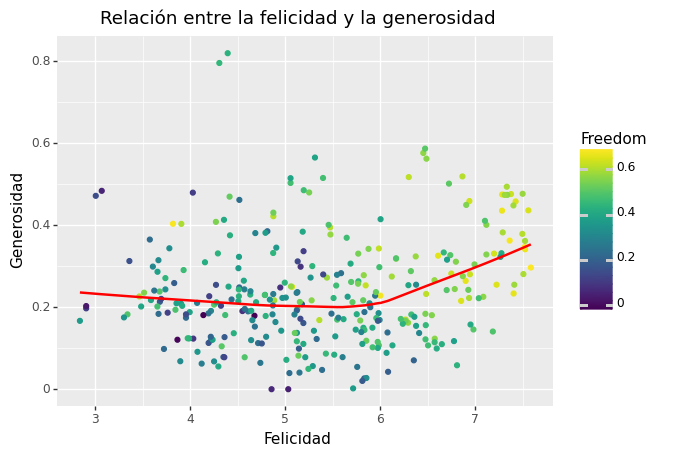

<ggplot: (97275131892)>

In [86]:
(ggplot(df) 
+geom_point(aes(x='Happiness Score', y = 'Generosity', color = 'Freedom'))  
+geom_smooth(aes(y="Generosity", x="Happiness Score"),color="red")
+ggtitle('Relación entre la felicidad y la generosidad') 
+xlab('Felicidad')
+ylab('Generosidad')
)


In [87]:
# Muestra la distribución del grado de distopía en función de la región.

C:\Users\Lucia\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 18'. Pick better value with 'binwidth'.


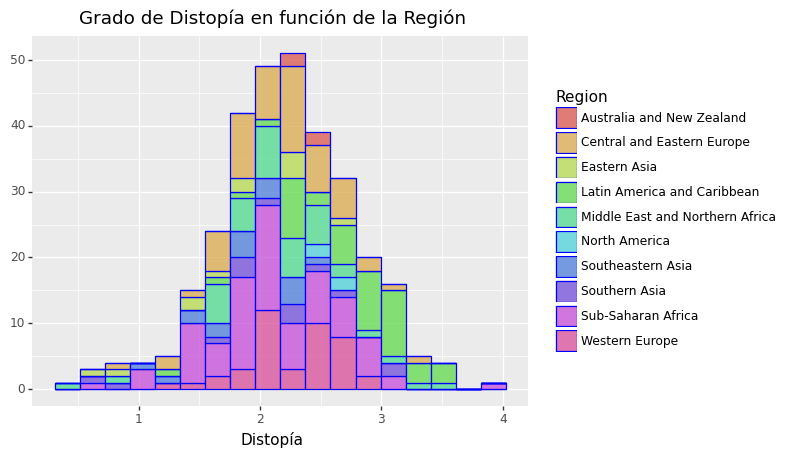

<ggplot: (97277616936)>

In [103]:
(ggplot(df)
+aes(x='Dystopia Residual', fill='Region')
+geom_histogram(color = 'blue', alpha=0.8)
+ggtitle('Grado de Distopía en función de la Región')
+ylab('')
+xlab('Distopía')
)

In [ ]:
#En la gráfica se puede ver que en los valores centrales de distopía es donde se centran la mayoría de las regiones.